# JDS Capstone: Target Market Analysis

You have been provided with information about the customers' historical purchase as the amount of money spent, Number of inactive months and so on. Two columns `Potential_Customer` and `Cust_Last_Purchase` represent the customers' respond to the latest advertisement. The column `Potential_Customer` represents if the customer purchased any product, and the column `Cust_Last_Purchase` represents the amount of this purchase and it is `Nan` if there has been no purchase.

## Data description
- Below is the description of each feature available in the dataset.
<img src="MicrosoftTeams-image.png" style="height: 700px">

## Objective
**1. Design a predictive model to determine the potential customers who will purchase if you send the advertisement .** The target variable is `Potential_Customer`. 

    **Attention:** Because the column `Cust_Last_Purchase` relates to the target variable `Potential_Customer`, you need to exclude it from your model.

**2. Calculate the value and the revenue of your model.** Fit your model on train set. Assume amonge the customers on your test set we only send advertisement to those your model predicted as Class1 and we ignore the rest. From the data you can calculate the average `Cust_Last_Purchase` for those who are in the train set and had the last purchase (`Cust_Last_Purchase`>0) . Assume sending advertisement to each customer costs 5$ and the average purchase you calculated on the train set remains the same for the test set. Calculate the value of your models to choose the best model.

    - cost = advertisement_cost * number of the predicted positive
    - lost = average_purchase * number of the predicted negative but they have been positive
    - gain = average_purchase * number of the predicted positive and they have been positive
    - value = gain - lost - cost
    - revenue = gain - cost

**3. Compare your best model's revenue with the revenue of the default solution which is sending advertisement to all the customers in X_test.** Which solution would you choose?

    - cost = advertisement_cost * size of the test set
    - gain = sum(Cust_Last_Purchase) on test set
    - revenue = gain - cost
    
**4. Assume the next time you want to target a group of 30,000 customers simillar to this group. And assume the purchase rate is $10%$ which means 10 out of 100 people who receive the advertisement will purchase the product. Also assume your model will have the same Precision and Recall for Class1 .** Will you send the advertisement to everyone, or you use one of the models you have already created?

    - calculate your model's revenue on this set of 30,000 customers based on the above assumptions
    - calculate the revenue of the default model: send advertisement to everyone
         - cost = advertisement_cost * size of the test set
         - gain = average_purchase * purchase_rate
         - revenue = gain - cost
    
**Hint:**
    To calculate the revenue of a model for this new set of customers with different purchase rate we need to calculate the new confusion matrix given Precision and Recall for Class1 are fixed.

#   0. Import necessary Packages

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import SCORERS, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

#  1. Load the Data into Pandas Dataframe

In [2]:
data = pd.read_csv('../data.csv')

In [3]:
data.head(30).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Potential_Customer,1,1,0,1,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
C_ID,9946,87939,88003,188721,88056,88119,88113,88092,88153,88151,...,325,88386,88410,88417,87781,88900,88489,88479,88474,88535
Cust_Last_Purchase,$5.00,$30.00,NaN,$20.00,$5.00,$10.00,NaN,NaN,$13.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,$25.00,NaN,$5.00,$26.00
Pur_3_years,2,1,5,1,3,4,3,1,4,4,...,2,5,1,1,1,5,2,3,4,1
Pur_5_years,17,7,12,11,15,15,12,3,16,14,...,10,10,10,1,14,8,11,7,12,10
Pur_3_years_Indirect,2,0,3,0,2,4,3,1,3,4,...,2,3,0,1,0,1,2,1,3,0
Pur_5_years_Indirect,4,3,5,3,7,12,8,3,9,14,...,6,5,4,1,5,1,10,5,6,5
Pur_latest,$0.00,$25.00,$15.00,$20.00,$3.00,$10.00,$18.00,$20.00,$5.00,$16.00,...,$35.00,$14.00,$20.00,$20.00,$17.00,$10.00,$30.00,$16.00,$10.00,$21.00
Pur_3_years_Avg,$7.50,$25.00,$15.00,$20.00,$4.33,$7.75,$18.00,$20.00,$7.75,$14.50,...,$32.50,$14.80,$20.00,$20.00,$17.00,$7.60,$27.50,$14.00,$11.00,$21.00
Pur_5_years_Avg,$7.76,$13.00,$11.25,$12.45,$3.80,$7.00,$14.58,$18.33,$8.06,$11.57,...,$20.90,$12.80,$14.00,$20.00,$16.14,$8.88,$17.00,$11.43,$9.83,$8.40


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Potential_Customer,4469.0,0.480868,0.499690,0.0,0.0,0.0,1.0,1.0
C_ID,4469.0,73837.719848,36156.968605,12.0,52713.0,75790.0,93705.0,191672.0
Pur_3_years,4469.0,3.297158,2.207326,0.0,2.0,3.0,4.0,15.0
Pur_5_years,4469.0,11.006042,9.459082,1.0,4.0,9.0,15.0,91.0
Pur_3_years_Indirect,4469.0,1.897516,1.629178,0.0,1.0,2.0,3.0,9.0
Pur_5_years_Indirect,4469.0,5.867756,4.939174,0.0,2.0,4.0,9.0,41.0
InAct_Last,4469.0,17.923697,4.130671,4.0,16.0,18.0,20.0,27.0
InAct_First,4469.0,73.605952,38.094688,15.0,40.0,74.0,111.0,260.0
Ad_Res_1_year,4469.0,13.070038,4.991064,3.0,11.0,12.0,13.0,49.0
Ad_Res_3_Year,4469.0,29.631237,7.787209,5.0,26.0,31.0,34.0,71.0


# 2. Data Cleaning
Checking the existance of missing values, the type of variables, or integrity of data. 

## 2.1 How big is the dataset? (number of rows, features and total datapoints)

In [5]:
data.shape

(4469, 25)

## 2.2 What is the type of each column?

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

### 2.2.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`? Fix the type of the columns as it should be.

**Attention:** Some numerical columns have missing values, Dollar sign, or Comma. You need to fix the issue to be able to convert the column to numerical. 

**Hint:** 
1. The following code can help you to remove an 'OldSign' and replace it with a 'NewSign' or nothing: `df.col=df.col.str.replace('OldSign', 'NewSign')`

2. After removing the signs and replace it with correct sign, or nothing you need to:

    a- Create a list of the name of the categorical columns and the numerical columns:
        `CatCols=[Name of the Categorical columns]`
        `NumCols=list(set(data.columns)-set(CatCols))`
    
    b- Fix the type of the columns
        `data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))`
        `data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))`

In [7]:
CatCols = list(set(['Status_Cust','Gender','Cust_Prop','Potential_Customer','Status_Latest_Ad']))
NumCols = list(set(data.columns)-set(CatCols))

print(CatCols)
print(NumCols)

['Status_Latest_Ad', 'Potential_Customer', 'Status_Cust', 'Gender', 'Cust_Prop']
['C_ID', 'Ad_Res_5_Year', 'Ad_Res_Ind_5_Year', 'Pur_5_years_Avg', 'Ad_Res_1_year', 'InAct_Last', 'Pur_5_years', 'Pur_3_years_Avg_Indirect', 'Cust_Last_Purchase', 'Age', 'Cust_Ann_Income', 'Pur_3_years_Indirect', 'Pur_3_years', 'Pur_3_years_Avg', 'InAct_First', 'Ad_Res_3_Year', 'Pur_5_years_Indirect', 'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_1_Year', 'Pur_latest']


In [8]:
data[CatCols] = data[CatCols].astype('category')
data[CatCols].dtypes

Status_Latest_Ad      category
Potential_Customer    category
Status_Cust           category
Gender                category
Cust_Prop             category
dtype: object

In [9]:
data['Pur_latest']=data['Pur_latest'].str.replace('$', '').str.replace(',','')
data['Pur_3_years_Avg']=data['Pur_3_years_Avg'].str.replace('$', '').str.replace(',','')
data['Pur_5_years_Avg']=data['Pur_5_years_Avg'].str.replace('$', '').str.replace(',','')
data['Pur_3_years_Avg_Indirect']=data['Pur_3_years_Avg_Indirect'].str.replace('$', '').str.replace(',','')
data['Cust_Last_Purchase']=data['Cust_Last_Purchase'].str.replace('$', '').str.replace(',','')
data['Cust_Ann_Income']=data['Cust_Ann_Income'].str.replace('$', '').str.replace(',','')

In [10]:
data[NumCols] = data[NumCols].astype('float64')
data[NumCols].dtypes

C_ID                        float64
Ad_Res_5_Year               float64
Ad_Res_Ind_5_Year           float64
Pur_5_years_Avg             float64
Ad_Res_1_year               float64
InAct_Last                  float64
Pur_5_years                 float64
Pur_3_years_Avg_Indirect    float64
Cust_Last_Purchase          float64
Age                         float64
Cust_Ann_Income             float64
Pur_3_years_Indirect        float64
Pur_3_years                 float64
Pur_3_years_Avg             float64
InAct_First                 float64
Ad_Res_3_Year               float64
Pur_5_years_Indirect        float64
Ad_Res_Ind_3_Year           float64
Ad_Res_Ind_1_Year           float64
Pur_latest                  float64
dtype: object

## 2.3 Check data for duplicate rows and remove the duplicates

**Hint:**

1. `data.duplicated()` will give you `True` if the row in `data` is duplicate and `False` otherwise.

2. `duplicates.sum()` will tell you how many duplicates you have in `data`.

3. `data=data.drop_duplicates()` will remove the duplicates

In [11]:
duplicates = data.duplicated()

In [12]:
duplicates.sum()

851

In [13]:
data=data.drop_duplicates()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Potential_Customer        3618 non-null   category
 1   C_ID                      3618 non-null   float64 
 2   Cust_Last_Purchase        1736 non-null   float64 
 3   Pur_3_years               3618 non-null   float64 
 4   Pur_5_years               3618 non-null   float64 
 5   Pur_3_years_Indirect      3618 non-null   float64 
 6   Pur_5_years_Indirect      3618 non-null   float64 
 7   Pur_latest                3618 non-null   float64 
 8   Pur_3_years_Avg           3618 non-null   float64 
 9   Pur_5_years_Avg           3618 non-null   float64 
 10  Pur_3_years_Avg_Indirect  2956 non-null   float64 
 11  InAct_Last                3618 non-null   float64 
 12  InAct_First               3618 non-null   float64 
 13  Ad_Res_1_year             3618 non-null   float6

## 2.4 Do we need `C_ID` in our analysis? Drop the columns you will not use in your analysis, if there is any.

**Hint:** 
1. Drop the useless column(s)
2. Remove the name of the column(s) from `CatCols` or `NumCols`
    Example: CatCols.remove('C_ID')

In [15]:
data = data.drop(columns='C_ID')

In [16]:
data.columns

Index(['Potential_Customer', 'Cust_Last_Purchase', 'Pur_3_years',
       'Pur_5_years', 'Pur_3_years_Indirect', 'Pur_5_years_Indirect',
       'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg',
       'Pur_3_years_Avg_Indirect', 'InAct_Last', 'InAct_First',
       'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year',
       'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_5_Year', 'Status_Cust',
       'Status_Latest_Ad', 'Age', 'Gender', 'Cust_Prop', 'Cust_Ann_Income'],
      dtype='object')

# 3. Exploratory Data Analysis (EDA)
    
Checking the relationship betweem variables, summary of data, outliers, filling missing values etc.
**If the ultimate goal is designing predictive models on the data, and we use EDA as part of the proprocessing, we are NOT allowed to do EDA on the test set.** However, if you only do EDA to get business insight from the data, you **CAN** use the whole data, if you don't use that insight for data preprocessing such as data cleaning.
    
**Example:** To impute the missing values by mean/median, we calculate the mean or the median on the Train set only and then we impute the missing values by that mean/median on both Train and Test data.

## 3.2 Explore Categorical Variables
1. How many categories in each categorical variables?
2. What proportion/percentage from each category?

**Hint:**
For visualization you can use `sns.countplot()` for each categorical variable


In [17]:
data.describe(include='category')

,Potential_Customer,Status_Cust,Status_Latest_Ad,Gender,Cust_Prop
count,3618,3618,3618,3618,3618
unique,2,6,2,3,2
top,0,A,1,F,H
freq,1882,2146,2057,1922,1981


Status_Latest_Ad
1    56.85
0    43.15
Name: Status_Latest_Ad, dtype: float64
----------------------------------------------------------------------------------------------


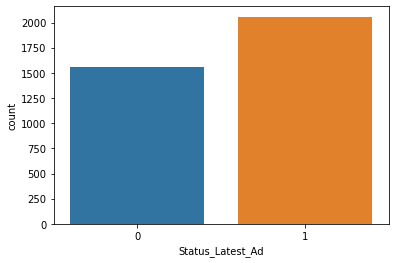

----------------------------------------------------------------------------------------------
Potential_Customer
0    52.02
1    47.98
Name: Potential_Customer, dtype: float64
----------------------------------------------------------------------------------------------


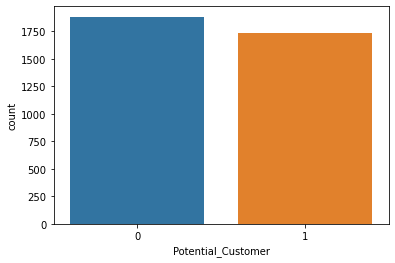

----------------------------------------------------------------------------------------------
Status_Cust
A    59.31
S    26.64
F     6.05
N     5.72
E     1.99
L     0.28
Name: Status_Cust, dtype: float64
----------------------------------------------------------------------------------------------


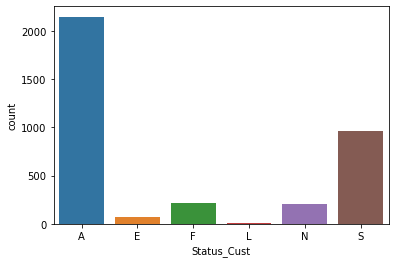

----------------------------------------------------------------------------------------------
Gender
F    53.12
M    42.29
U     4.59
Name: Gender, dtype: float64
----------------------------------------------------------------------------------------------


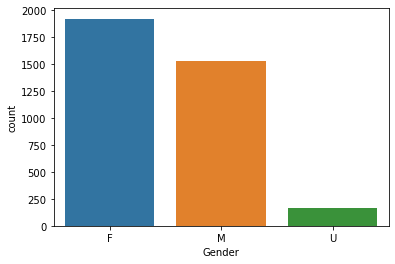

----------------------------------------------------------------------------------------------
Cust_Prop
H    54.75
U    45.25
Name: Cust_Prop, dtype: float64
----------------------------------------------------------------------------------------------


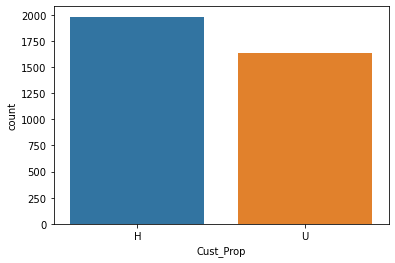

----------------------------------------------------------------------------------------------


In [18]:
for cat in CatCols:
    print(cat)
    print(round(data[cat].value_counts(normalize=True)*100, 2))
    print('----------------------------------------------------------------------------------------------')
    sns.countplot(x=cat,data=data)
    plt.show()
    print('----------------------------------------------------------------------------------------------')

### 3.1.1 Insight

### 3.1.2 Solution

## 3.2 Explore Relationship Between Categorical & Target Variable. Interpret the observation

**Hint**: 
1. Create list of the categorical features:
    `CatFes=list(set(CatCols)-set(['Potential_Customer']))`

2. use `sns.countplot()` to create subplots for each categorical feature and hue=`data.Potential_Customer` to assign color to the plot based on the target variable `Potential_Customer`

In [19]:
CatFes=list(set(CatCols)-set(['Potential_Customer']))
CatFes

['Status_Cust', 'Cust_Prop', 'Status_Latest_Ad', 'Gender']

----------------------------------------------------------------------------------------------
Status_Cust


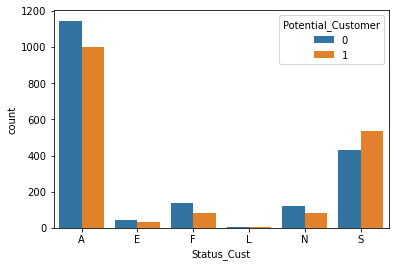

----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------
Cust_Prop


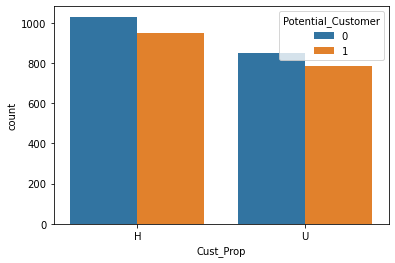

----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------
Status_Latest_Ad


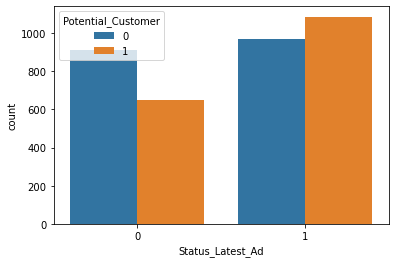

----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------
Gender


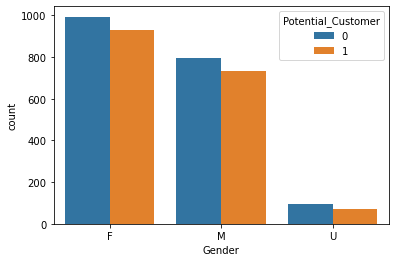

----------------------------------------------------------------------------------------------


In [20]:
for cat in CatFes:
    print('----------------------------------------------------------------------------------------------')
    print(cat)
    sns.countplot(x=cat,data=data,hue='Potential_Customer')
    plt.show()
    print('----------------------------------------------------------------------------------------------') 

### 3.2.1. Insight

## 3.3 Explore Numerical Variables

**Hint**: use `sns.distplot()` and `sns.boxplot()`

In [22]:
NumCols = list(set(data.columns)-set(CatCols))
NumCols

['Ad_Res_5_Year',
 'Ad_Res_Ind_5_Year',
 'Pur_5_years_Avg',
 'Ad_Res_1_year',
 'InAct_Last',
 'Pur_5_years',
 'Pur_3_years_Avg_Indirect',
 'Cust_Last_Purchase',
 'Age',
 'Cust_Ann_Income',
 'Pur_3_years_Indirect',
 'Pur_3_years',
 'Pur_3_years_Avg',
 'InAct_First',
 'Ad_Res_3_Year',
 'Pur_5_years_Indirect',
 'Ad_Res_Ind_3_Year',
 'Ad_Res_Ind_1_Year',
 'Pur_latest']

----------------------------------------------------------------------------------------------
Ad_Res_5_Year


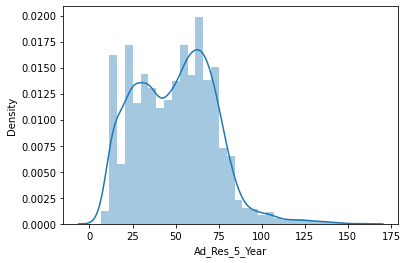

----------------------------------------------------------------------------------------------
Ad_Res_Ind_5_Year


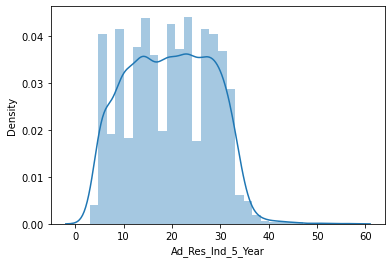

----------------------------------------------------------------------------------------------
Pur_5_years_Avg


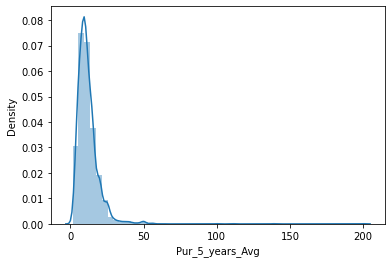

----------------------------------------------------------------------------------------------
Ad_Res_1_year


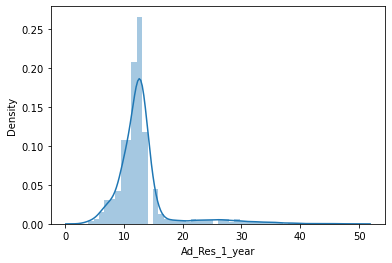

----------------------------------------------------------------------------------------------
InAct_Last


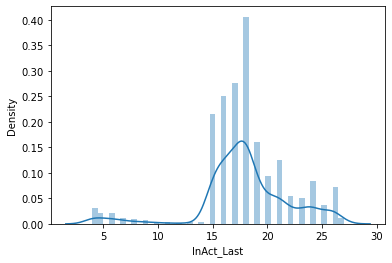

----------------------------------------------------------------------------------------------
Pur_5_years


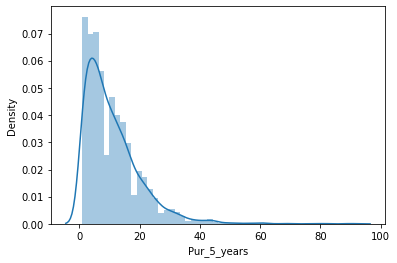

----------------------------------------------------------------------------------------------
Pur_3_years_Avg_Indirect


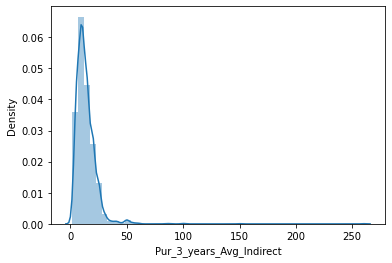

----------------------------------------------------------------------------------------------
Cust_Last_Purchase


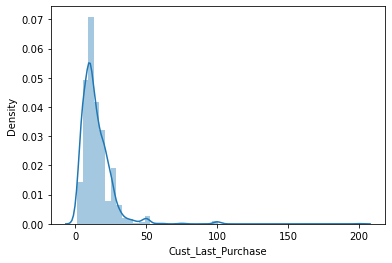

----------------------------------------------------------------------------------------------
Age


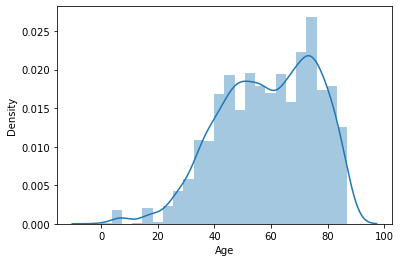

----------------------------------------------------------------------------------------------
Cust_Ann_Income


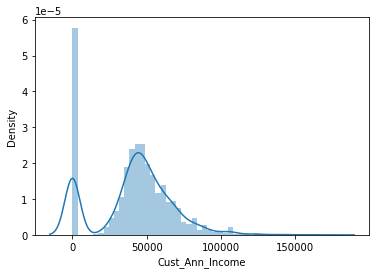

----------------------------------------------------------------------------------------------
Pur_3_years_Indirect


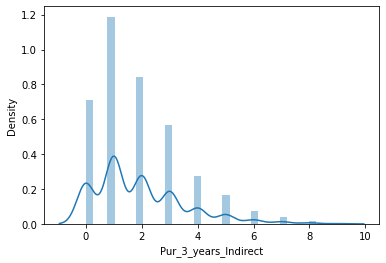

----------------------------------------------------------------------------------------------
Pur_3_years


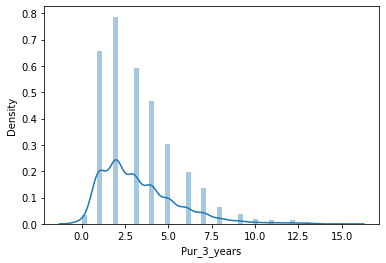

----------------------------------------------------------------------------------------------
Pur_3_years_Avg


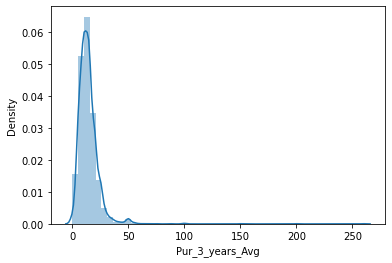

----------------------------------------------------------------------------------------------
InAct_First


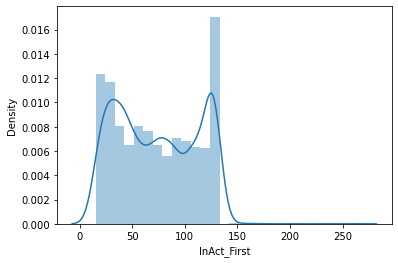

----------------------------------------------------------------------------------------------
Ad_Res_3_Year


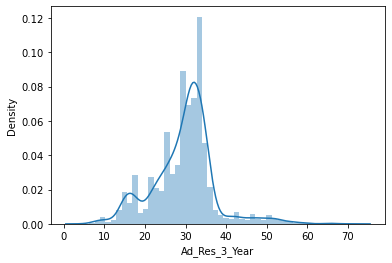

----------------------------------------------------------------------------------------------
Pur_5_years_Indirect


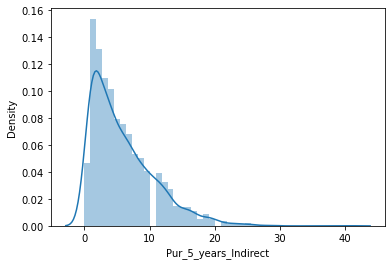

----------------------------------------------------------------------------------------------
Ad_Res_Ind_3_Year


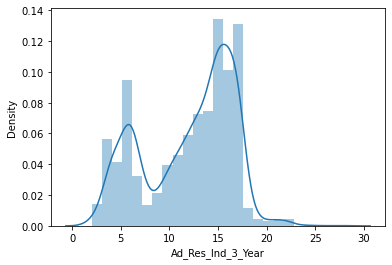

----------------------------------------------------------------------------------------------
Ad_Res_Ind_1_Year


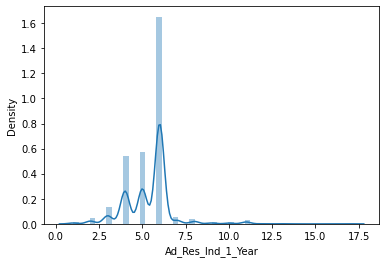

----------------------------------------------------------------------------------------------
Pur_latest


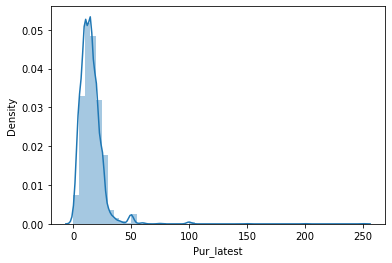

In [23]:
for column in NumCols:
    print('----------------------------------------------------------------------------------------------')
    print(column)
    sns.distplot(data[column])
    plt.show()

----------------------------------------------------------------------------------------------
Ad_Res_5_Year


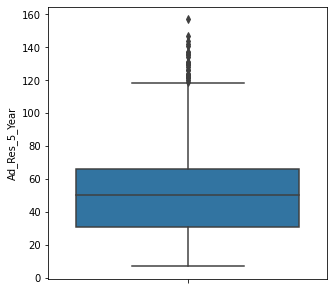

----------------------------------------------------------------------------------------------
Ad_Res_Ind_5_Year


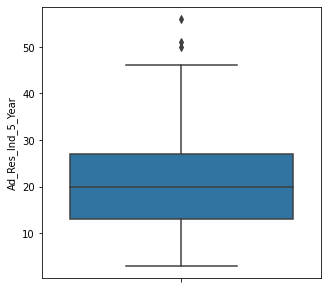

----------------------------------------------------------------------------------------------
Pur_5_years_Avg


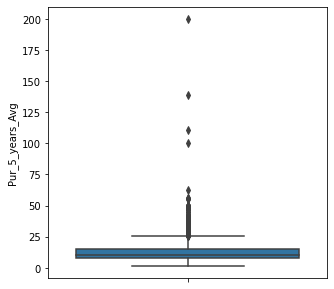

----------------------------------------------------------------------------------------------
Ad_Res_1_year


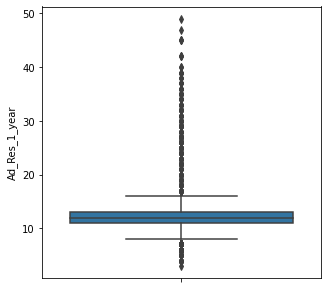

----------------------------------------------------------------------------------------------
InAct_Last


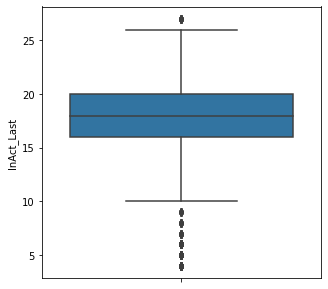

----------------------------------------------------------------------------------------------
Pur_5_years


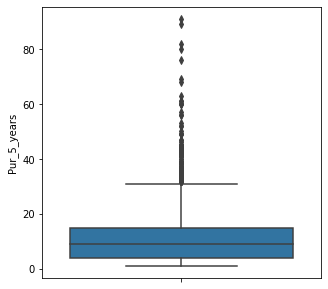

----------------------------------------------------------------------------------------------
Pur_3_years_Avg_Indirect


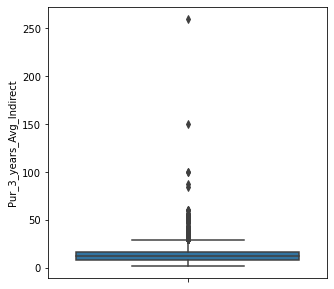

----------------------------------------------------------------------------------------------
Cust_Last_Purchase


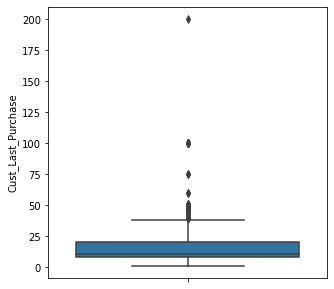

----------------------------------------------------------------------------------------------
Age


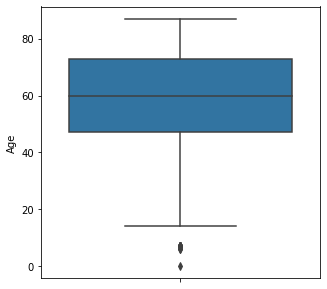

----------------------------------------------------------------------------------------------
Cust_Ann_Income


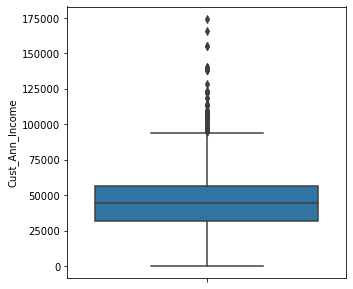

----------------------------------------------------------------------------------------------
Pur_3_years_Indirect


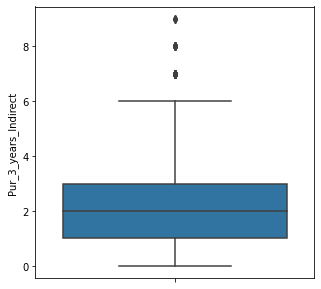

----------------------------------------------------------------------------------------------
Pur_3_years


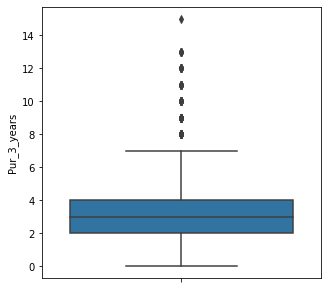

----------------------------------------------------------------------------------------------
Pur_3_years_Avg


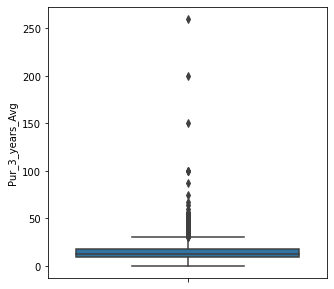

----------------------------------------------------------------------------------------------
InAct_First


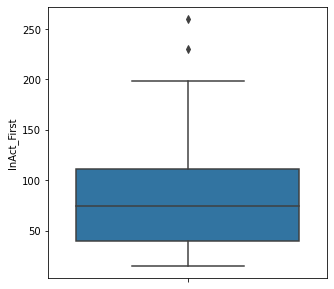

----------------------------------------------------------------------------------------------
Ad_Res_3_Year


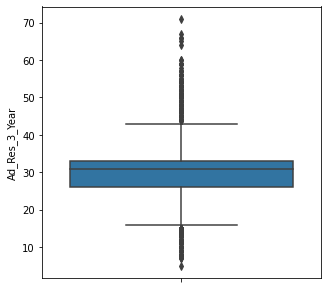

----------------------------------------------------------------------------------------------
Pur_5_years_Indirect


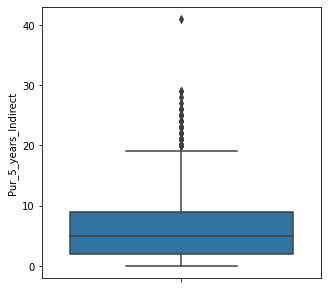

----------------------------------------------------------------------------------------------
Ad_Res_Ind_3_Year


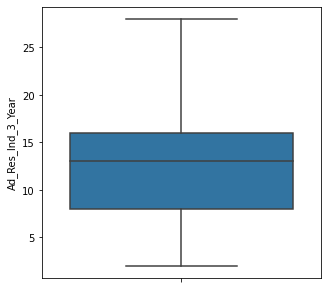

----------------------------------------------------------------------------------------------
Ad_Res_Ind_1_Year


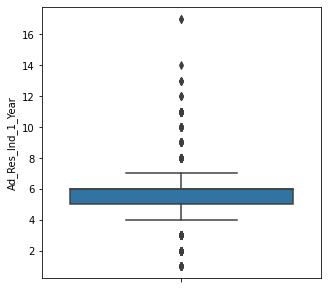

----------------------------------------------------------------------------------------------
Pur_latest


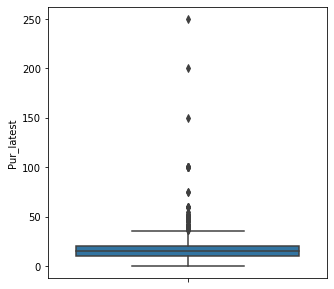

In [24]:
for column in NumCols:
    print('----------------------------------------------------------------------------------------------')
    print(column)
    plt.figure(figsize=(5,5))
    sns.boxplot(data=data, y=column)
    plt.show()

### 3.3.1 Insight

In [ ]:
From the boxplot, we can see the data has a lot of outliers

## 3.4 Explore the Relationship between Numerical Variables & Target Variable. Interpret your observation

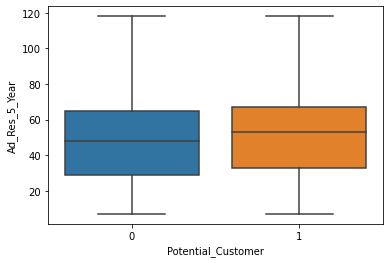

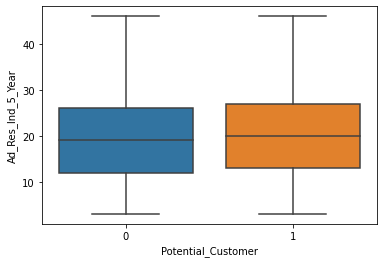

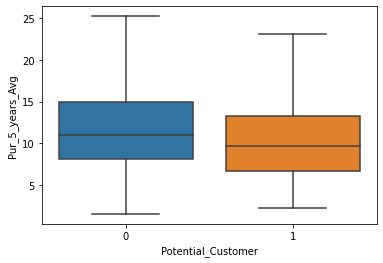

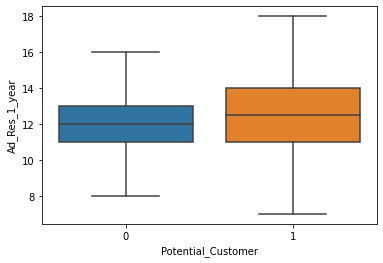

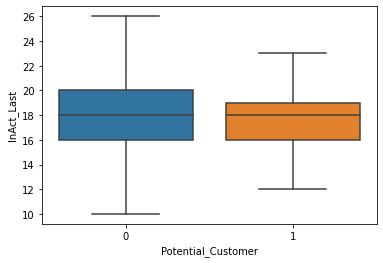

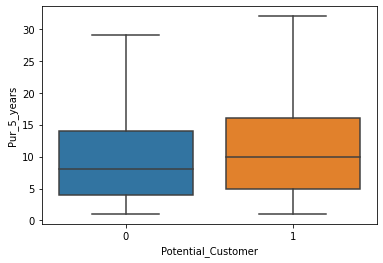

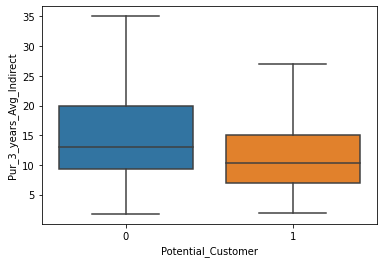

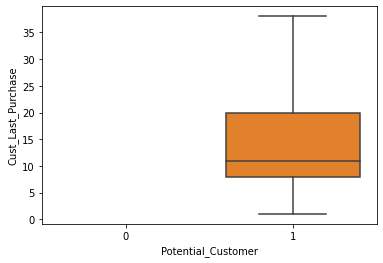

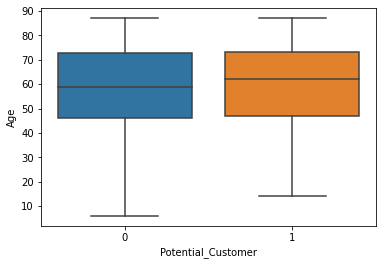

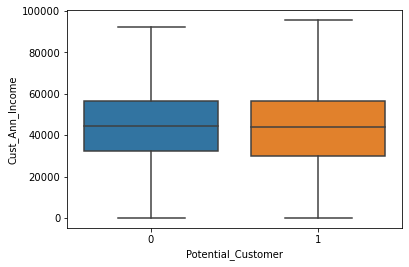

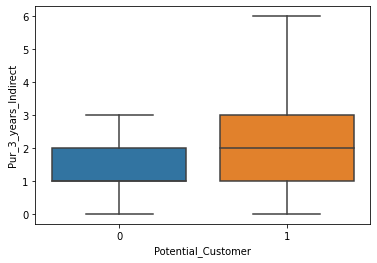

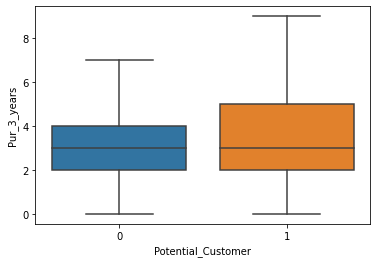

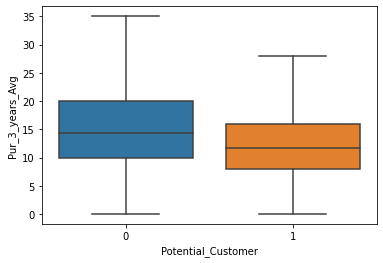

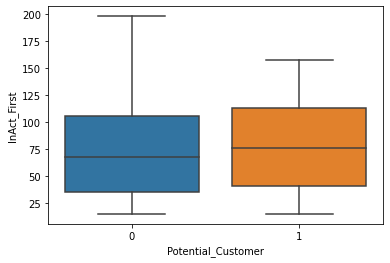

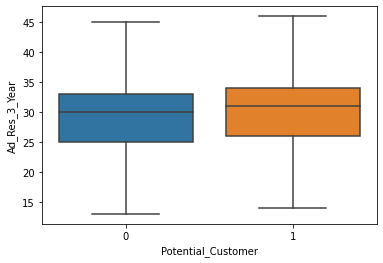

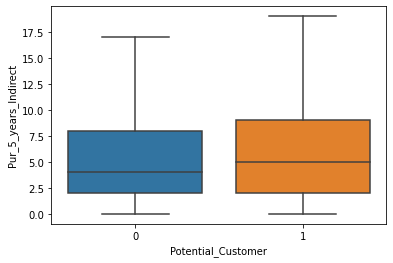

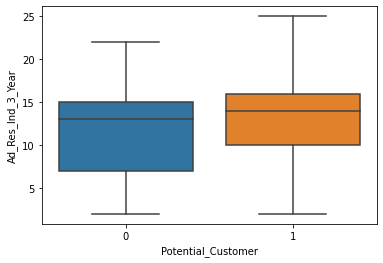

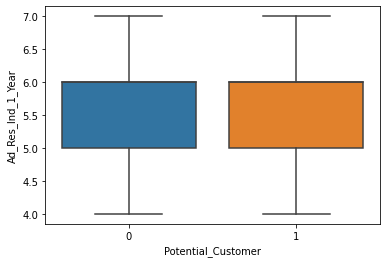

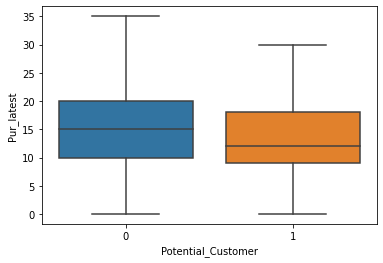

In [25]:
for column in NumCols:
    plt.figure()  
    sns.boxplot(x=data.Potential_Customer,y=data[column], data=data,showfliers=False);

## 3.5 Explore the Relationship between the columns and try to answer the following questions:

1. Is there any significant difference between men/women's salary?

2. Is there any significant difference between men/women's number of the purchase in the last three years?

3. Is there any significant difference between men/women's average purchase in the last three years?

4. Is there any significant difference between men/women's total purchase in the last three years?

5. (optional) You can explore more about the relationships between the columns, if you believe the insight will improve some dicisions in this company. For instance, sending advertisements to customers regarding gender, customer status, etc.

<AxesSubplot:xlabel='Gender', ylabel='Cust_Ann_Income'>

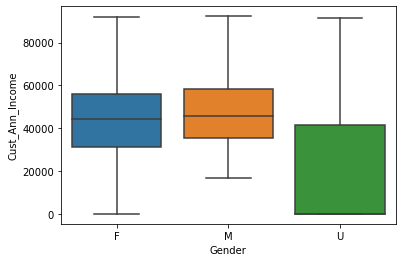

In [26]:
#1
sns.boxplot(x='Gender',y='Cust_Ann_Income', data=data,showfliers=False)

<AxesSubplot:xlabel='Gender', ylabel='Pur_3_years'>

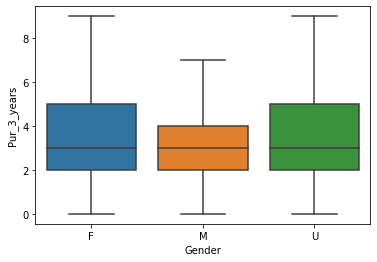

In [27]:
#2
sns.boxplot(x='Gender',y='Pur_3_years',showfliers=False, data=data)

<AxesSubplot:xlabel='Gender', ylabel='Pur_3_years_Avg'>

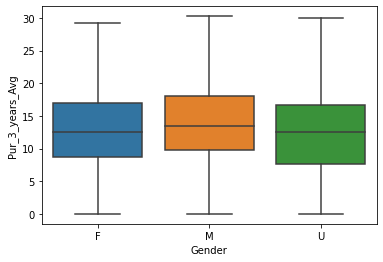

In [28]:
#3
sns.boxplot(x='Gender',y='Pur_3_years_Avg', data=data,showfliers=False)

<AxesSubplot:xlabel='Gender'>

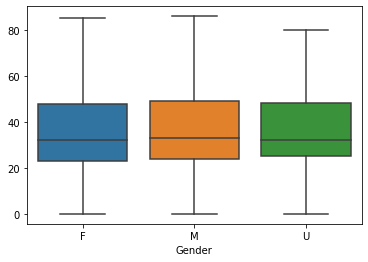

In [29]:
#4
total = data.Pur_3_years*data.Pur_3_years_Avg
sns.boxplot(x='Gender',y=total, data=data,showfliers=False)

# 4. Feature Enginearing

## 4.1 Add Some High Level Features and explore their relationship with the target variable

Sometimes we can use high level features that reflect the interactions between the columns as new features to get better insight and feed more information to our predictive models. Also transformation of some columns can be better options to be fed to the models. For instance, instead of a numerical column, you can use log of the column, square of the column, or any other transformation of the column. The type of interaction, or transformation you should choose, can be defined after Exploratory data analysis or just business insight.

**Example:** Instead of two variables for the number of purchase, and the average amount of purchase, we could calculate the total amount of purchase for the customers. 

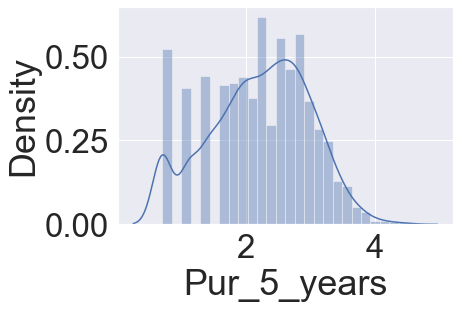

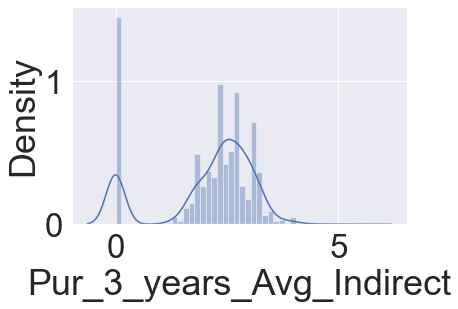

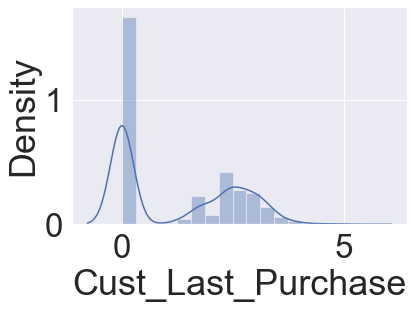

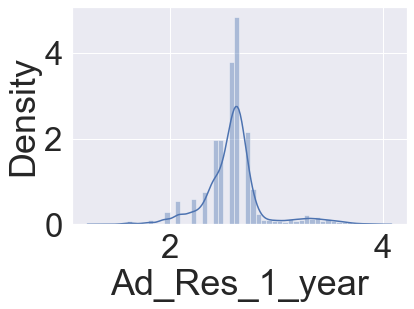

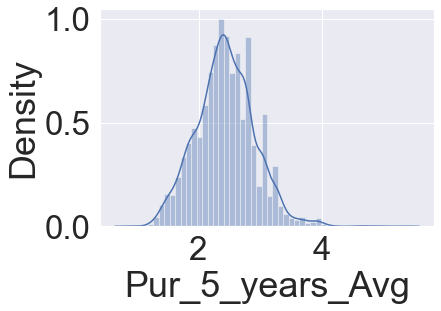

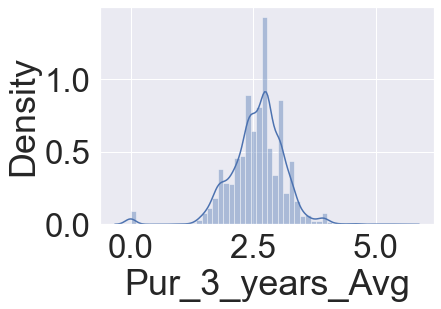

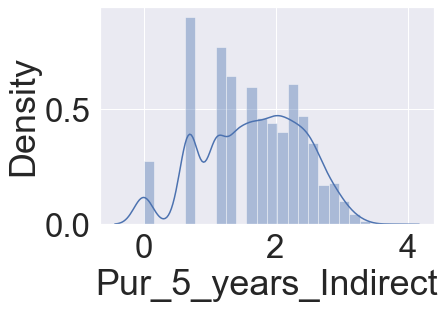

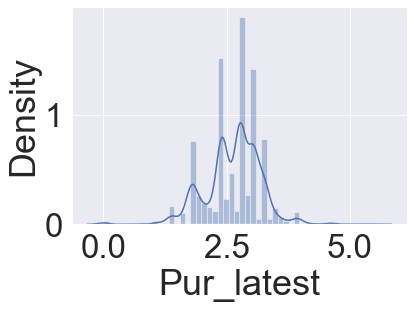

In [88]:
pur5yrsplsone = (data['Pur_5_years']+1)
log5yrs = np.log(pur5yrsplsone)
data['log_pur_5yrs']=log5yrs

pur3yrsavgind = (data['Pur_3_years_Avg_Indirect']+1)
log3yrsavgind = np.log(pur3yrsavgind)

custlastpur = (data['Cust_Last_Purchase']+1)
logcustlaspur = np.log(custlastpur)

pur3yrs = (data['Pur_5_years']+1)
log3yrs = np.log(pur3yrs)

adres1yr = (data['Ad_Res_1_year']+1)
logadres1yrs = np.log(adres1yr)

pur5yrsavg = (data['Pur_5_years_Avg']+1)
log5yrsavg = np.log(pur5yrsavg)

pur3yrsavg = (data['Pur_3_years_Avg']+1)
log3yrsavg = np.log(pur3yrsavg)

pur5yrsavgind = (data['Pur_5_years_Indirect']+1)
log5yrsavgind = np.log(pur5yrsavgind)

purlat = (data['Pur_latest']+1)
logpurlat = np.log(purlat)


sns.distplot(log5yrs)
plt.show()
sns.distplot(log3yrsavgind)
plt.show()
sns.distplot(logcustlaspur)
plt.show()
sns.distplot(logadres1yrs)
plt.show()
sns.distplot(log5yrsavg)
plt.show()
sns.distplot(log3yrsavg)
plt.show()
sns.distplot(log5yrsavgind)
plt.show()
sns.distplot(logpurlat)
plt.show()

## 4.2 Check Correlation between Numerical Variables

In [30]:
correlation = data.corr()

<AxesSubplot:>

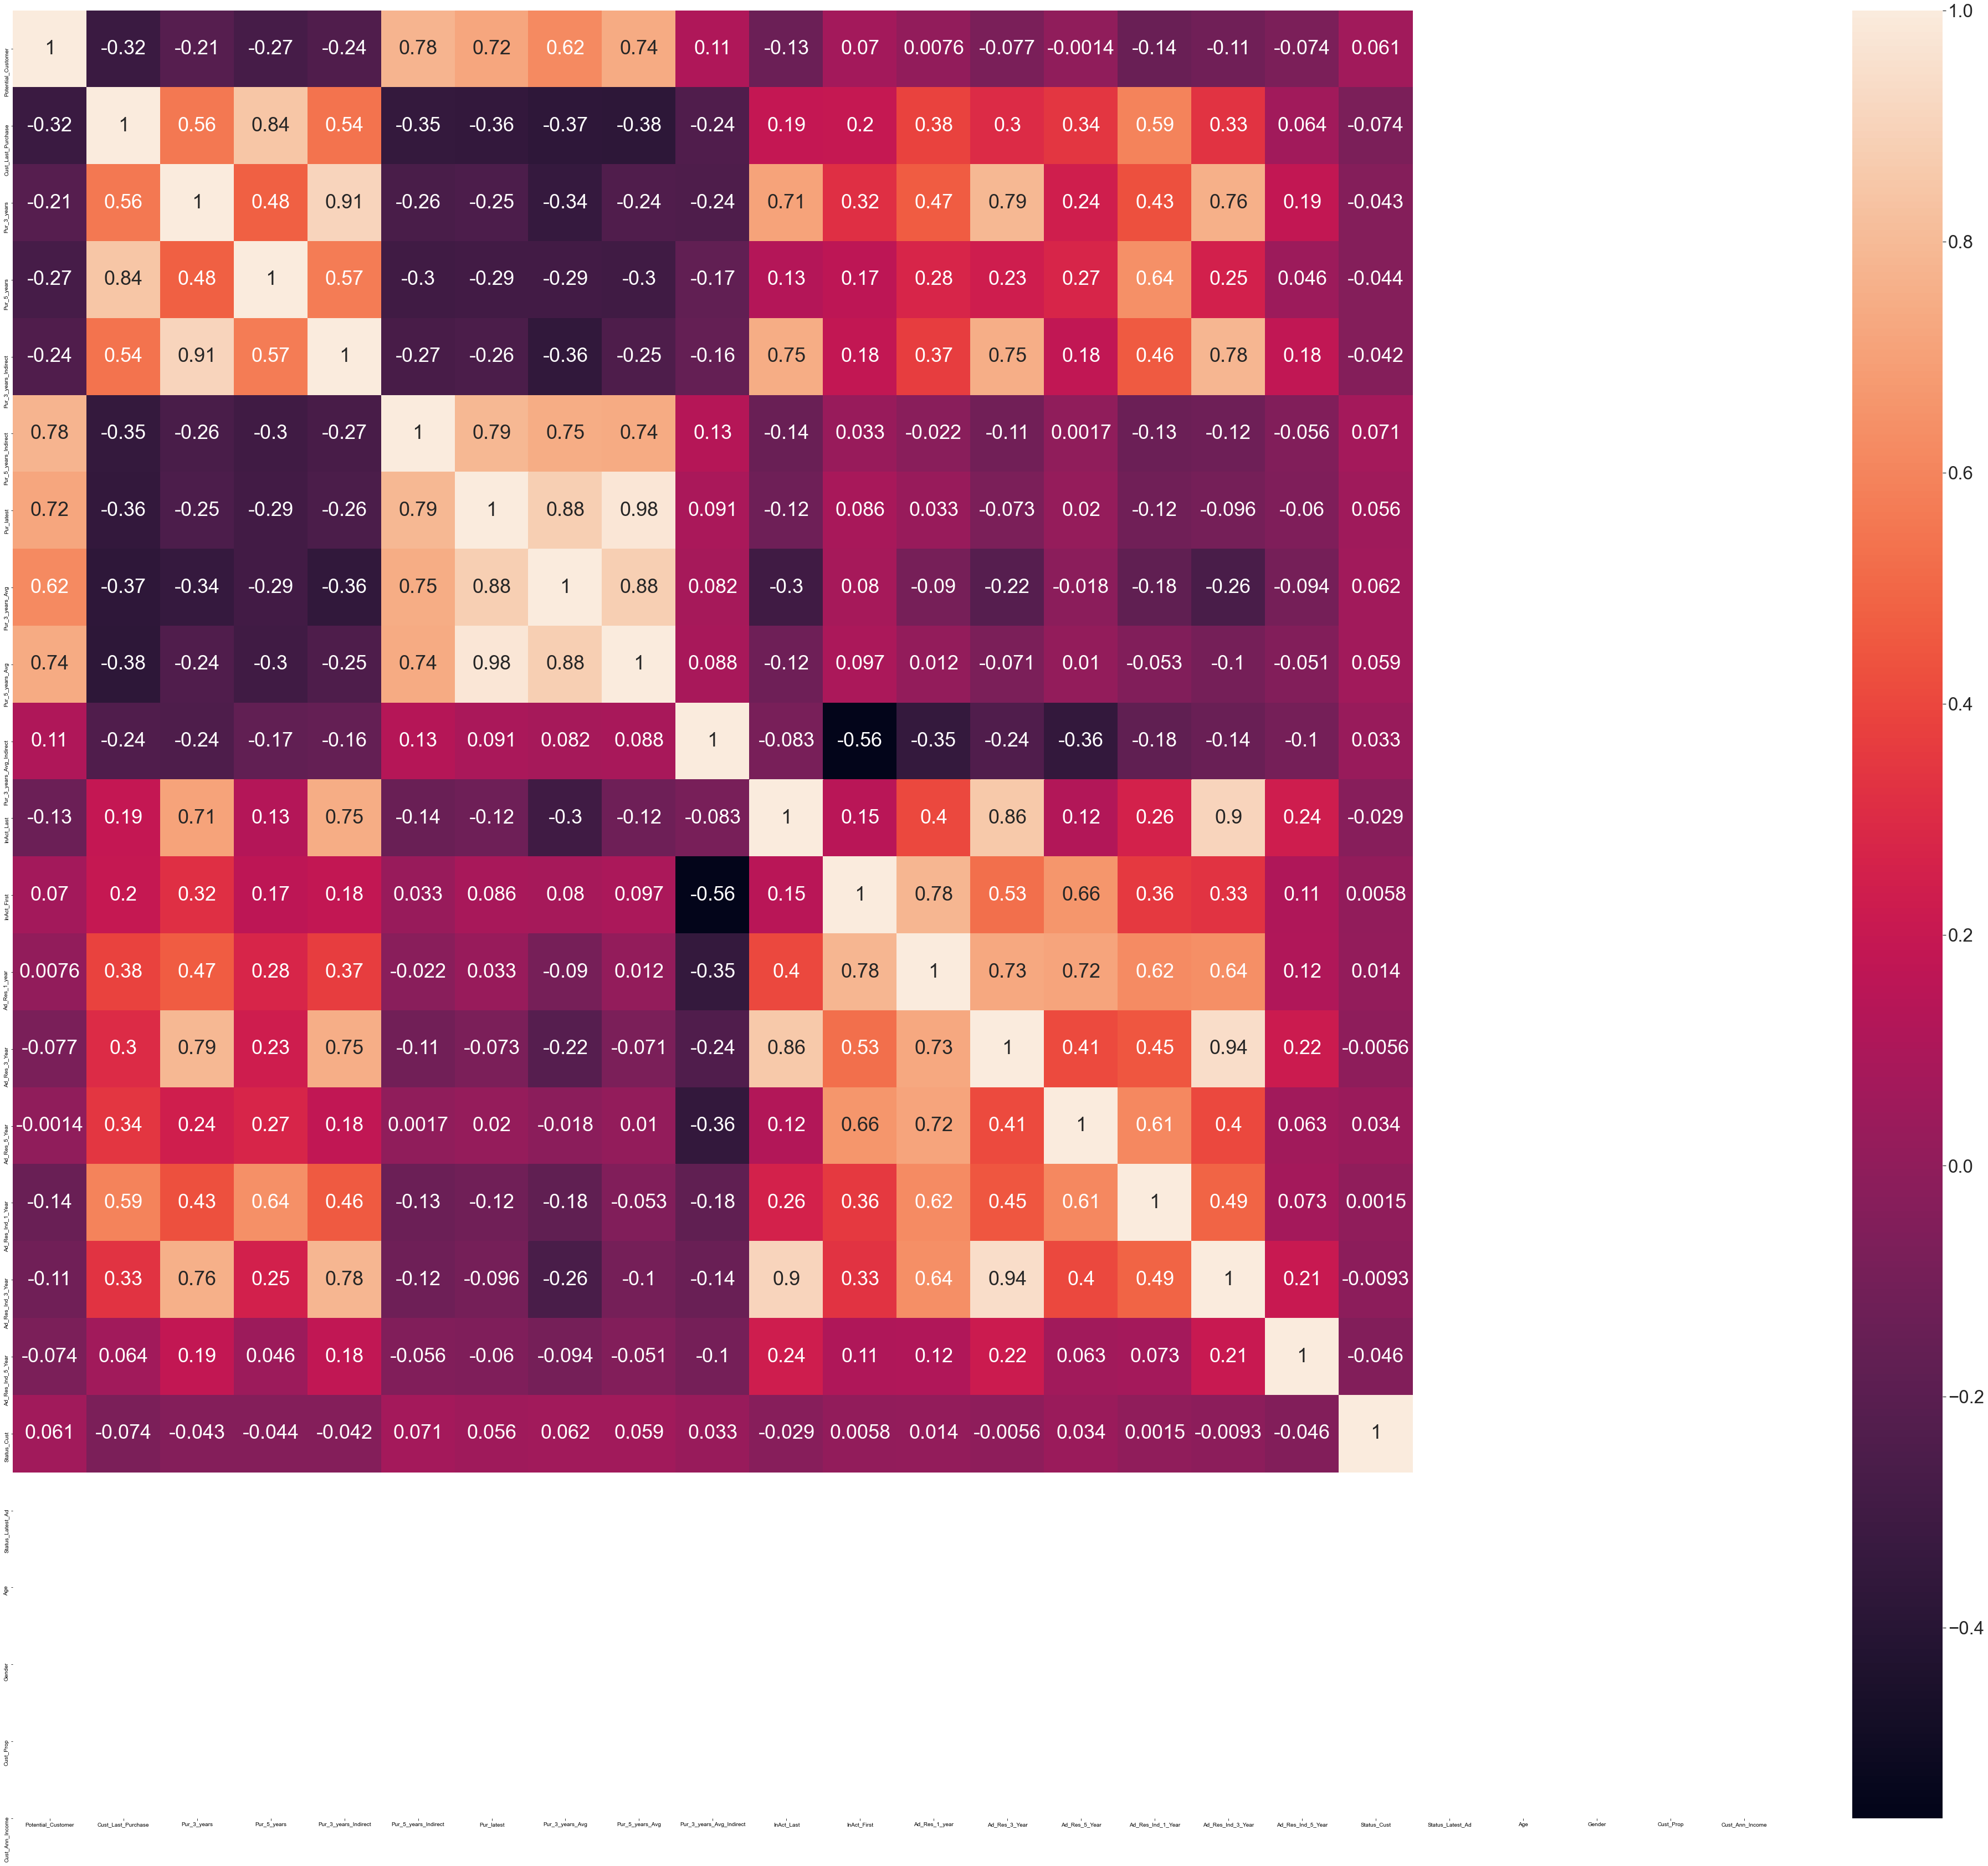

In [31]:
plt.subplots(figsize=(70,60))
sns.set(font_scale=3)
sns.heatmap(correlation, xticklabels=data.columns, yticklabels=data.columns,annot=True)

# 5. Feature Selection

It is better we do not have numerical columns with high correlations as they confuse the machine learning algorithms. We can manually remove the highly-correlated features, or we can let the PCA handles that during the pre-processing.

# 6. Data PreProcessing

## 6.1 Check the Data for Missing Values
**Hint:**
1. Check which columns have missing values

2. Create a list of the name of the columns that have missing values
    `null_columns=data.columns[data.isnull().any()]`
   
3. Decide how you should handle the missing values for each column:

    a. For some numerical columns missing value simply means 0.
    b. We can fill missing values in a numerical column by replacing mean of the column, if the column is not skewed. If the column is skewed, median might be a better option.

In [32]:
data.isna()

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3614,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3615,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3616,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
null_columns=data.columns[data.isnull().any()]
null_columns

Index(['Cust_Last_Purchase', 'Pur_3_years_Avg_Indirect', 'Age'], dtype='object')

In [34]:
data['Age'].fillna((data['Age'].mean()),inplace=True)

In [35]:
data[CatCols] = data[CatCols].astype('object')
data[CatCols].dtypes

Status_Latest_Ad      object
Potential_Customer    object
Status_Cust           object
Gender                object
Cust_Prop             object
dtype: object

In [36]:
data= data.fillna(0)

In [37]:
data[CatCols] = data[CatCols].astype('category')
data[CatCols].dtypes

Status_Latest_Ad      category
Potential_Customer    category
Status_Cust           category
Gender                category
Cust_Prop             category
dtype: object

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Potential_Customer        3618 non-null   category
 1   Cust_Last_Purchase        3618 non-null   float64 
 2   Pur_3_years               3618 non-null   float64 
 3   Pur_5_years               3618 non-null   float64 
 4   Pur_3_years_Indirect      3618 non-null   float64 
 5   Pur_5_years_Indirect      3618 non-null   float64 
 6   Pur_latest                3618 non-null   float64 
 7   Pur_3_years_Avg           3618 non-null   float64 
 8   Pur_5_years_Avg           3618 non-null   float64 
 9   Pur_3_years_Avg_Indirect  3618 non-null   float64 
 10  InAct_Last                3618 non-null   float64 
 11  InAct_First               3618 non-null   float64 
 12  Ad_Res_1_year             3618 non-null   float64 
 13  Ad_Res_3_Year             3618 non-null   float6

## 6.2 Separate X (features) and y (target)

**Attention:** Don't forget to exclude the column `Cust_Last_Purchase` from your analysis

In [39]:
NewNumCols = data.drop(columns=['Potential_Customer','Cust_Last_Purchase','Status_Cust','Status_Latest_Ad','Gender',
                                'Cust_Prop'])
NewCatCols = data.drop(columns=NumCols).drop(columns='Potential_Customer')

In [40]:
NewNumCols

,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Age,Cust_Ann_Income
0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.50,14.0,110.0,32.0,48.0,73.0,3.0,12.0,16.0,71.0,65957.0
1,1.0,7.0,0.0,3.0,25.0,25.00,13.00,0.00,18.0,75.0,13.0,35.0,55.0,6.0,6.0,22.0,7.0,0.0
2,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.67,19.0,57.0,14.0,35.0,53.0,6.0,17.0,22.0,79.0,0.0
3,1.0,11.0,0.0,3.0,20.0,20.00,12.45,0.00,5.0,113.0,17.0,38.0,71.0,8.0,8.0,33.0,73.0,76293.0
4,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.00,17.0,118.0,13.0,28.0,63.0,6.0,12.0,24.0,68.0,113663.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,2.0,6.0,0.0,1.0,20.0,16.50,13.33,0.00,19.0,57.0,13.0,34.0,47.0,6.0,6.0,17.0,33.0,83754.0
3614,7.0,31.0,4.0,21.0,13.0,12.71,10.94,13.25,17.0,128.0,13.0,32.0,88.0,6.0,17.0,35.0,81.0,83754.0
3615,7.0,13.0,6.0,8.0,3.0,12.43,10.62,12.50,4.0,80.0,16.0,36.0,57.0,7.0,18.0,24.0,39.0,0.0
3616,1.0,11.0,1.0,7.0,20.0,20.00,16.55,20.00,24.0,93.0,11.0,31.0,61.0,6.0,15.0,25.0,76.0,71618.0


In [41]:
NewCatCols

,Status_Cust,Status_Latest_Ad,Gender,Cust_Prop
0,A,0,F,H
1,A,1,M,U
2,S,1,F,U
3,A,0,F,U
4,S,1,F,H
...,...,...,...,...
3613,A,0,F,H
3614,S,1,F,H
3615,A,1,M,U
3616,A,1,M,H


## 6.3 Dummy Variables
Change categorical variables with numerical variabels

In [42]:
data_dum = pd.get_dummies(NewCatCols,drop_first=True)

In [43]:
data_dum

,Status_Cust_E,Status_Cust_F,Status_Cust_L,Status_Cust_N,Status_Cust_S,Status_Latest_Ad_1,Gender_M,Gender_U,Cust_Prop_U
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,1
2,0,0,0,0,1,1,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
3613,0,0,0,0,0,0,0,0,0
3614,0,0,0,0,1,1,0,0,0
3615,0,0,0,0,0,1,1,0,1
3616,0,0,0,0,0,1,1,0,0


## 6.4 Split data to train/test 

Define X and y and split the data into 75/25 train/test set. Use random_state=42 and stratify=y

## 6.5 Feature Scaling

## 6.6 PCA on Numerical Columns only

1. Save the above scaled train and test data, as dataframe with proper column names
`X_train_sc=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)`
2. Separate train and test data for numerical columns only
`train_PCA=X_train_sc[NewNumCols]`, `test_PCA=X_test_sc[NewNumCols]`
3. Define the number of components on `train_PCA`
4. Fit PCA on `train_PCA` 
5. Transform `train_PCA` and `test_PCA` save it as `PCA_train` and `PCA_test`, and save them as DataFrame. Use `PCA_train.index=X_train.index` to make sure `PCA_train` have the same index with `X_train` because we need to concat this data to the dummy variables. Do the same on `PCA_test`
6. Concat `PCA_train` to the dummy variables in `X_train` save it as `X_train_pca`
7. Concat `PCA_test` to the dummy variables in `X_test` save it as `X_train_pca`

In [44]:
from sklearn.decomposition import PCA
scaler = StandardScaler().fit(NewNumCols)
NewScaledNum=scaler.transform(NewNumCols)
NewScaledNum.shape

(3618, 18)

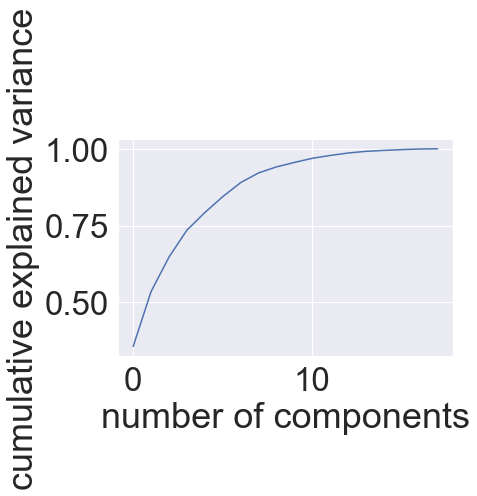

In [45]:
pca_num=PCA().fit(NewScaledNum)

plt.plot(np.cumsum(pca_num.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [46]:
pca_num=PCA(12).fit(NewScaledNum)
tpca_num= pca_num.transform(NewScaledNum)

In [47]:
tpca_num.shape

(3618, 12)

In [48]:
tpca_concat = pd.DataFrame(tpca_num)
tpca_concat

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.100163,0.240430,-0.260315,-2.852062,-0.166326,-0.883531,0.919038,-0.680566,3.476436,1.713801,-0.357095,-0.499195
1,-1.272271,0.821385,0.693892,-1.436181,-0.454400,4.090575,0.143017,0.720044,-0.541356,0.149652,-0.163986,-0.038998
2,1.081076,0.394389,-0.907624,0.579993,1.736238,-0.329482,-1.356343,0.221729,0.134040,0.244745,-0.135432,0.249434
3,1.432831,1.702459,0.621803,-3.799219,-0.442322,-1.067148,1.082809,-0.102406,-2.013963,-0.252700,-0.622110,-0.217342
4,1.464576,-1.324263,0.624387,-0.905976,-2.226255,-1.789972,0.342653,-0.443920,-0.242396,-0.374641,-0.155987,-0.325674
...,...,...,...,...,...,...,...,...,...,...,...,...
3613,-1.587277,0.255482,0.115506,-1.637473,-2.304554,0.865563,0.312678,0.929949,-0.140062,0.088450,-0.230107,0.285455
3614,4.721221,0.135367,1.347740,1.678175,-0.662405,-1.860164,0.959149,0.434113,-0.209139,-0.640187,0.199295,0.185017
3615,3.163144,0.102191,-3.074745,0.236769,1.315904,1.591382,1.681741,-0.815401,-1.149318,-0.028262,-1.134917,-0.810746
3616,0.006646,1.362520,1.505409,0.495116,-0.916521,-1.324789,-1.446956,-0.330278,0.116770,-0.493776,0.248027,-0.021077


In [49]:
data_pca_concat = pd.concat([tpca_concat,data_dum],axis=1)
data_pca_concat

,0,1,2,3,4,5,6,7,8,9,...,11,Status_Cust_E,Status_Cust_F,Status_Cust_L,Status_Cust_N,Status_Cust_S,Status_Latest_Ad_1,Gender_M,Gender_U,Cust_Prop_U
0,2.100163,0.240430,-0.260315,-2.852062,-0.166326,-0.883531,0.919038,-0.680566,3.476436,1.713801,...,-0.499195,0,0,0,0,0,0,0,0,0
1,-1.272271,0.821385,0.693892,-1.436181,-0.454400,4.090575,0.143017,0.720044,-0.541356,0.149652,...,-0.038998,0,0,0,0,0,1,1,0,1
2,1.081076,0.394389,-0.907624,0.579993,1.736238,-0.329482,-1.356343,0.221729,0.134040,0.244745,...,0.249434,0,0,0,0,1,1,0,0,1
3,1.432831,1.702459,0.621803,-3.799219,-0.442322,-1.067148,1.082809,-0.102406,-2.013963,-0.252700,...,-0.217342,0,0,0,0,0,0,0,0,1
4,1.464576,-1.324263,0.624387,-0.905976,-2.226255,-1.789972,0.342653,-0.443920,-0.242396,-0.374641,...,-0.325674,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,-1.587277,0.255482,0.115506,-1.637473,-2.304554,0.865563,0.312678,0.929949,-0.140062,0.088450,...,0.285455,0,0,0,0,0,0,0,0,0
3614,4.721221,0.135367,1.347740,1.678175,-0.662405,-1.860164,0.959149,0.434113,-0.209139,-0.640187,...,0.185017,0,0,0,0,1,1,0,0,0
3615,3.163144,0.102191,-3.074745,0.236769,1.315904,1.591382,1.681741,-0.815401,-1.149318,-0.028262,...,-0.810746,0,0,0,0,0,1,1,0,1
3616,0.006646,1.362520,1.505409,0.495116,-0.916521,-1.324789,-1.446956,-0.330278,0.116770,-0.493776,...,-0.021077,0,0,0,0,0,1,1,0,0


In [50]:
X = data_pca_concat
y = data.Potential_Customer

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [52]:
X_train.shape

(2713, 21)

In [53]:
X_test.shape

(905, 21)

# 7. Objective 1: Machine Learning
    
**1. Design a predictive model to determine the potential customers who will purchase if you send the advertisement .** The target variable is `Potential_Customer`. 

    **Attention:** Because the column `Cust_Last_Purchase` relates to the target variable `Potential_Customer`, you need to exclude it from your model.


Apply various ML algorithms on the data, evaluate them after Grid Search and Cross Validation, and choose the best model.

In [163]:
#KNN
knn_param_grid = {'n_neighbors': np.arange(1, 30),
                  'p': [1,2],
                 'weights':['uniform','distance']}
                   

knn_grid = GridSearchCV(KNeighborsClassifier(), 
                        knn_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
knn_grid.fit(X_train, y_train)
print('Knn Best parameters', knn_grid.best_params_)
knn_model = knn_grid.best_estimator_
knn_model.fit(X_train, y_train)
print('Knn best score = ',knn_grid.best_score_ )

knn_pred = knn_model.predict(X_test)
print('Knn best model confusion matrix on test data  \n',confusion_matrix(y_test, knn_pred)  )
print('*********************************************')
print('Knn best model Precision  on test data = {:.2f}'.format(precision_score(y_test, knn_pred)))
print('Knn best model Recall  on test data = {:.2f}'.format(recall_score(y_test, knn_pred)))
print('Knn best model F1 on test data = {:.2f}'.format(f1_score(y_test, knn_pred)))
print('Knn best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, knn_pred)))
print('*********************************************')

Knn Best parameters {'n_neighbors': 21, 'p': 2, 'weights': 'distance'}
Knn best score =  0.5822389601665854
Knn best model confusion matrix on test data  
 [[264 207]
 [208 226]]
*********************************************
Knn best model Precision  on test data = 0.52
Knn best model Recall  on test data = 0.52
Knn best model F1 on test data = 0.52
Knn best model Accuracy  on test data = 0.54
*********************************************


In [102]:
#Decision Tree
dt_param_grid = {'max_depth': np.arange(1, 10)}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                        dt_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
dt_grid.fit(X_train, y_train)
print('DecisionTree Best parameters', dt_grid.best_params_)
dt_model = dt_grid.best_estimator_
print('DecisionTree best score = ',dt_grid.best_score_ )

dt_pred = dt_model.predict(X_test)
print('Decision Tree best model confusion matrix on test data  \n',confusion_matrix(y_test, dt_pred)  )
print('*********************************************')
print('Decision Tree best model Precision  on test data = {:.2f}'.format(precision_score(y_test, dt_pred)))
print('Decision Tree best model Recall on test data = {:.2f}'.format(recall_score(y_test, dt_pred)))
print('Decision Tree best model F1 on test data  = {:.2f}'.format(f1_score(y_test, dt_pred)))
print('Decision Tree best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, dt_pred)))
print('*********************************************')

DecisionTree Best parameters {'max_depth': 6}
DecisionTree best score =  0.5791737927560098
Decision Tree best model confusion matrix on test data  
 [[268 203]
 [205 229]]
*********************************************
Decision Tree best model Precision  on test data = 0.53
Decision Tree best model Recall on test data = 0.53
Decision Tree best model F1 on test data  = 0.53
Decision Tree best model Accuracy  on test data = 0.55
*********************************************


In [165]:
#Logistics Regression
logr_param_grid = {'C': [0.001, 0.004, 0.01, 0.1, 0.4, 1, 10, 50, 100],
                   'penalty' : ['l1', 'l2'],
                   'fit_intercept': [True, False]}

logr_grid = GridSearchCV(LogisticRegression(solver='liblinear'), 
                        logr_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
logr_grid.fit(X_train, y_train)
print('LogisticRegression Best parameters', logr_grid.best_params_)
logr_model = logr_grid.best_estimator_
print('LogisticRegression best score = ',logr_grid.best_score_ )

logr_pred = logr_model.predict(X_test)
print('Logistic Regression best model confusion matrix on test data  \n',confusion_matrix(y_test, logr_pred)  )
print('*********************************************')
print('Logistic Regression best model Precision  on test data = {:.2f}'.format(precision_score(y_test, logr_pred)))
print('Logistic Regression best model Recall on test data = {:.2f}'.format(recall_score(y_test, logr_pred)))
print('Logistic Regression best model F1 on test data  = {:.2f}'.format(f1_score(y_test, logr_pred)))
print('Logistic Regression best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, logr_pred)))
print('*********************************************')

LogisticRegression Best parameters {'C': 0.001, 'fit_intercept': True, 'penalty': 'l2'}
LogisticRegression best score =  0.5936884146383302
Logistic Regression best model confusion matrix on test data  
 [[290 181]
 [222 212]]
*********************************************
Logistic Regression best model Precision  on test data = 0.54
Logistic Regression best model Recall on test data = 0.49
Logistic Regression best model F1 on test data  = 0.51
Logistic Regression best model Accuracy  on test data = 0.55
*********************************************


In [166]:
#SVM
svc_param_grid = {'C': [0.001, 0.004, 0.01, 0.1, 0.4, 1, 10, 50, 100],
                  'kernel' : ['linear', 'rbf'],
                  'gamma': [0.001, 0.004, 0.01, 0.1, 0.4, 1, 10, 50, 100]}

svc_grid = GridSearchCV(SVC(), 
                        svc_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
svc_grid.fit(X_train, y_train)
print('SVC Best parameters', svc_grid.best_params_)
svc_model = svc_grid.best_estimator_
print('SVC best score = ',svc_grid.best_score_ )

svc_pred = svc_model.predict(X_test)
print('SVC best model confusion matrix on test data  \n',confusion_matrix(y_test, svc_pred)  )
print('*********************************************')
print('SVC best model Precision  on test data = {:.2f}'.format(precision_score(y_test, svc_pred)))
print('SVC best model Recall on test data = {:.2f}'.format(recall_score(y_test, svc_pred)))
print('SVC best model F1 on test data  = {:.2f}'.format(f1_score(y_test, svc_pred)))
print('SVC best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, svc_pred)))
print('*********************************************')

LogisticRegression Best parameters {'C': 10, 'gamma': 0.004, 'kernel': 'rbf'}
LogisticRegression best score =  0.6023706158595808
SVC best model confusion matrix on test data  
 [[341 130]
 [257 177]]
*********************************************
SVC best model Precision  on test data = 0.58
SVC best model Recall on test data = 0.41
SVC best model F1 on test data  = 0.48
SVC best model Accuracy  on test data = 0.57
*********************************************


# 8. Objective 2

**2. Calculate the value and the revenue of your model.** Fit your model on train set. Assume amonge the customers on your test set we only send advertisement to those your model predicted as Class1 and we ignore the rest. From the data you can calculate the average `Cust_Last_Purchase` for those who are in the train set and had the last purchase (`Cust_Last_Purchase`>0) . Assume sending advertisement to each customer costs 5$ and the average purchase you calculated on the train set remains the same for the test set. Calculate the value of your models to choose the best model.

    - cost = advertisement_cost * number of the predicted positive
    - lost = average_purchase * number of the predicted negative but they have been positive
    - gain = average_purchase * number of the predicted positive and they have been positive
    - value = gain - lost - cost
    - revenue = gain - cost

In [64]:
avg_pur=data[(data.index.isin(X_train.index))&(data.Cust_Last_Purchase>0)]['Cust_Last_Purchase'].mean()
avg_pur

14.694508448540706

In [90]:
#KNN
pred_pos = 264+207
pred_neg_pos = 208
pred_pos_pos = 264
ad_cost = 5

ob2_cost = ad_cost*pred_pos
ob2_lost = avg_pur*pred_neg_pos
ob2_gain = avg_pur*pred_pos_pos
ob2_val = ob2_gain-ob2_cost-ob2_lost
ob2_rev = ob2_gain-ob2_cost

print('The cost is ${:.2f}'.format(ob2_cost))
print('The lost is ${:.2f}'.format(ob2_lost))
print('The gain is ${:.2f}'.format(ob2_gain))
print('The value is ${:.2f}'.format(ob2_val))
print('The revenue is ${:.2f}'.format(ob2_rev))

The cost is $2355.00
The lost is $3056.46
The gain is $3879.35
The value is $-1532.11
The revenue is $1524.35


In [91]:
#Logistic Regression

pred_pos = 290+181
pred_neg_pos = 222
pred_pos_pos = 290
ad_cost = 5

ob2_cost = ad_cost*pred_pos
ob2_lost = avg_pur*pred_neg_pos
ob2_gain = avg_pur*pred_pos_pos
ob2_val = ob2_gain-ob2_cost-ob2_lost
ob2_rev = ob2_gain-ob2_cost

print('The cost is ${:.2f}'.format(ob2_cost))
print('The lost is ${:.2f}'.format(ob2_lost))
print('The gain is ${:.2f}'.format(ob2_gain))
print('The value is ${:.2f}'.format(ob2_val))
print('The revenue is ${:.2f}'.format(ob2_rev))

The cost is $2355.00
The lost is $3262.18
The gain is $4261.41
The value is $-1355.77
The revenue is $1906.41


In [92]:
#SVM
pred_pos = 341+130
pred_neg_pos = 257
pred_pos_pos = 341
ad_cost = 5

ob2_cost = ad_cost*pred_pos
ob2_lost = avg_pur*pred_neg_pos
ob2_gain = avg_pur*pred_pos_pos
ob2_val = ob2_gain-ob2_cost-ob2_lost
ob2_rev = ob2_gain-ob2_cost

print('The cost is ${:.2f}'.format(ob2_cost))
print('The lost is ${:.2f}'.format(ob2_lost))
print('The gain is ${:.2f}'.format(ob2_gain))
print('The value is ${:.2f}'.format(ob2_val))
print('The revenue is ${:.2f}'.format(ob2_rev))

The cost is $2355.00
The lost is $3776.49
The gain is $5010.83
The value is $-1120.66
The revenue is $2655.83


In [70]:
#Dec Tree
pred_pos = 268+203
pred_neg_pos = 205
pred_pos_pos = 268
ad_cost = 5

ob2_cost = ad_cost*pred_pos
ob2_lost = avg_pur*pred_neg_pos
ob2_gain = avg_pur*pred_pos_pos
ob2_val = ob2_gain-ob2_cost-ob2_lost
ob2_rev = ob2_gain-ob2_cost

print('The cost is ${:.2f}'.format(ob2_cost))
print('The lost is ${:.2f}'.format(ob2_lost))
print('The gain is ${:.2f}'.format(ob2_gain))
print('The value is ${:.2f}'.format(ob2_val))
print('The revenue is ${:.2f}'.format(ob2_rev))


The cost is $2355.00
The lost is $3012.37
The gain is $3938.13
The value is $-1429.25
The revenue is $1583.13


# 9. Objective 3
    
**3. Compare your best models' revenue with the revenue of the default solution which is sending advertisement to all the customers in X_test.** Which solution would you choose?

    - cost = advertisement_cost * size of the test set
    - gain = sum(Cust_Last_Purchase) on test set
    - revenue = gain - cost



In [89]:
ob3_cost = ad_cost*X_test.shape[0]
ob3_gain=data[(data.index.isin(X_test.index))]['Cust_Last_Purchase'].sum()
ob3_rev = ob3_gain - ob3_cost

#Default solution gives overview of revenue based on existing historical data without ML which could be
#not accurate since assumption that the sum of purchase would be consistent from previous
print('The cost is ${:.2f}'.format(ob3_cost))
print('The gain is ${:.2f}'.format(ob3_gain))
print('The revenue is ${:.2f}'.format(ob3_rev))

The cost is $4525.00
The gain is $6140.00
The revenue is $1615.00


# 10. Objective 4
    
**4. Assume the next time you want to target a group of 30,000 customers simillar to this group. And assume the purchase rate is $10%$ which means 10 out of 100 people who receive the advertisement will purchase the product. Also assume your model will have the same Precision and Recall for Class1 .** Will you send the advertisement to everyone, or you use one of the models you have already created?

    - calculate your model's revenue on this set of 30,000 customers based on the above assumptions
    - calculate the revenue of the default model: send advertisement to everyone
         - cost = advertisement_cost * size of the test set
         - gain = average_purchase * purchase_rate
         - revenue = gain - cost
    
**Hint:**
    To calculate the revenue of a model for this new set of customers with different purchase rate we need to calculate the new confusion matrix given Precision and Recall for Class1 are fixed.

In [94]:
purchase_rate = 0.1
test_size = 30000

In [98]:
ob4_modcost = ad_cost*(3690+2672)
ob4_modlost = avg_pur*(5310)
ob4_modgain = avg_pur*(3690)
ob4_modval = ob4_modgain-ob4_modcost-ob4_modlost
ob4_modrev = ob4_modgain-ob4_modcost

print('The cost is ${:.2f}'.format(ob4_modcost))
print('The lost is ${:.2f}'.format(ob4_modlost))
print('The gain is ${:.2f}'.format(ob4_modgain))
print('The value is ${:.2f}'.format(ob4_modval))
print('The revenue is ${:.2f}'.format(ob4_modrev))

The cost is $31810.00
The lost is $78027.84
The gain is $54222.74
The value is $-55615.10
The revenue is $22412.74


In [101]:
#Default
ob4_defcost = ad_cost * test_size
ob4_defgain = avg_pur*(purchase_rate*test_size)
ob4_defrev = ob4_defgain-ob4_defcost
#ob4_deflost = avg_pur*((1-purchase_rate)*test_size)
#ob4_defval = ob4_defgain-ob4_deflost-ob4_defcost


print('The cost is ${:.2f}'.format(ob4_defcost))
#print('The lost is ${:.2f}'.format(ob4_deflost))
print('The gain is ${:.2f}'.format(ob4_defgain))
#print('The value is ${:.2f}'.format(ob4_defval))
print('The revenue is ${:.2f}'.format(ob4_defrev))

The cost is $150000.00
The gain is $44083.53
The revenue is $-105916.47
